In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("data_clean.csv")

In [3]:
#choose relevant columns
#dummy variable
#train-test-split
#multiple linear regression
#lasso regression
#Random Forest
#Tune the models
#Test ensembles

In [4]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'minsal', 'maxsal', 'Average_salary', 'Job in HQ', 'Company_age',
       'python', 'sql', 'spark', 'excel', 'IT', 'R', 'Entry_level',
       'Competitors_cnt', 'Jobtitle_cat', 'Jobtitle_grp', 'Experience_level'],
      dtype='object')

In [5]:
data1=data[['Rating','Job Description','Type of ownership','Average_salary', 'Job in HQ', 'Company_age',
       'python', 'sql', 'spark', 'excel', 'IT', 'R', 'Entry_level',
       'Competitors_cnt', 'Jobtitle_grp', 'Experience_level','Location','Size','Industry', 'Sector', 'Revenue']]

In [6]:
data1.head()

,Rating,Job Description,Type of ownership,Average_salary,Job in HQ,Company_age,python,sql,spark,excel,IT,R,Entry_level,Competitors_cnt,Jobtitle_grp,Experience_level,Location,Size,Industry,Sector,Revenue
0,3.8,2536,Company - Private,72.0,0,48,1,0,0,1,0,1,0,0,data scientist,na,NM,501 to 1000 employees,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,3.4,4783,Other Organization,87.5,1,37,1,0,0,0,1,1,0,0,data scientist,na,MD,10000+ employees,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,4.8,3461,Company - Private,85.0,1,11,1,1,1,1,0,1,0,0,data scientist,na,FL,501 to 1000 employees,Security Services,Business Services,$100 to $500 million (USD)
3,3.8,3883,Government,76.5,1,56,1,0,0,0,0,1,0,3,data scientist,na,WA,1001 to 5000 employees,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,2.9,2728,Company - Private,114.5,1,23,1,1,0,1,0,1,0,3,data scientist,na,NY,51 to 200 employees,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [7]:
data1["Type of ownership"].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
School / School District            2
-1                                  1
Unknown                             1
Name: Type of ownership, dtype: int64

In [8]:
data1.shape

(742, 21)

In [9]:
dataenc=pd.get_dummies(data1)

In [10]:
dataenc.shape

(742, 179)

In [11]:
dataenc.head()

,Rating,Job Description,Average_salary,Job in HQ,Company_age,python,sql,spark,excel,IT,R,Entry_level,Competitors_cnt,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Jobtitle_grp_data analyst,Jobtitle_grp_data engineer,Jobtitle_grp_data scientist,Jobtitle_grp_director,Jobtitle_grp_machine learning,Jobtitle_grp_manager,Jobtitle_grp_na,Experience_level_junior,Experience_level_na,Experience_level_senior,Location_AL,Location_AZ,Location_CA,Location_CO,Location_CT,Location_DC,Location_DE,Location_FL,Location_GA,Location_IA,Location_ID,Location_IL,Location_IN,Location_KS,Location_KY,Location_LA,Location_MA,Location_MD,Location_MI,Location_MN,Location_MO,Location_NC,Location_NE,Location_NJ,Location_NM,Location_NY,Location_OH,Location_OR,Location_PA,Location_RI,Location_SC,Location_TN,Location_TX,Location_UT,Location_VA,Location_WA,Location_WI,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Reven

In [12]:
x=dataenc.drop(columns="Average_salary")

y=dataenc["Average_salary"].values

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

In [14]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
trainx.shape,testx.shape,trainy.shape,testy.shape

((593, 178), (149, 178), (593,), (149,))

In [16]:
import statsmodels.api as sm

In [17]:
xsm = x = sm.add_constant(x)
model = sm.OLS(y,xsm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     8.433
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.90e-79
Time:                        07:57:00   Log-Likelihood:                -3358.3
No. Observations:                 742   AIC:                             7005.
Df Residuals:                     598   BIC:                             7668.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.5857      8.244      5.287      0.000      27.395      59.777
Rating                                                3.6043      2.155      1.672      0.095      -0.629       7.837
Job Description                                       0.0004      0.001      0.482      0.630      -0.001       0.002
Job in HQ                                             5.5193      3.126      1.766      0.078      -0.620      11.659
Company_age                                           0.0058      0.032      0.182      0.855      -0.057       0.069
python                                                7.7102      2.746      2.808      0.005       2.318      13.102
sql                                                  -4.8274      2.686     -1.797      0.073     -10.103       0.448
spark                                                -3.7582      3.084     -1.218      0.224      -9.816       2.299
excel                                                -0.9778      2.400     -0.407      0.684      -5.691       3.735
IT                                                   -1.7815      2.583     -0.690      0.491      -6.854       3.291
R                                                     1.0374      8.010      0.130      0.897     -14.694      16.769
Entry_level                                          -5.7634     22.256     -0.259      0.796     -49.473      37.946
Competitors_cnt                                       2.7033      0.929      2.910      0.004       0.879       4.528
Type of ownership_-1                                 19.7940      8.907      2.222      0.027       2.302      37.286
Type of ownership_College / University                1.4639     19.054      0.077      0.939     -35.958      38.886
Type of ownership_Company - Private                  13.1170      5.996      2.188      0.029       1.342      24.893
Type of ownership_Company - Public                   18.5552      6.519      2.846      0.005       5.752      31.358
Type of ownership_Government                        -17.1525     16.104     -1.065      0.287     -48.779      14.474
Type of ownership_Hospital                          -18.4522     10.685     -1.727      0.085     -39.436       2.532
Type of ownership_Nonprofit Organization             -7.6856      7.401     -1.038      0.299     -22.220       6.849
Type of ownership_Other Organization                 -5.6906     15.430     -0.369      0.712     -35.994      24.613
Type of ownership_School / School District          -15.8053     25.266     -0.626      0.532     -65.426      33.815
Type of ownership_Subsidiary or Business Segment     13.2810      7.660      1.734      0.083      -1.763      28.325
Type of ownersh

In [18]:
from sklearn.linear_model import LinearRegression,Lasso

In [19]:
lr=LinearRegression()

In [20]:
score=cross_val_score(lr,trainx,trainy,scoring="neg_mean_absolute_error")

In [21]:
score

array([-20.47842556, -20.79428414, -21.34221928, -20.09834872,
       -22.65449571])

In [22]:
score.mean()

-21.07355468207018

In [23]:
scorei=cross_val_score(lr,trainx,trainy,cv=10)
scorei.mean()

0.42730929258605627

In [24]:
ls=Lasso()

In [25]:
score2=cross_val_score(ls,trainx,trainy,scoring="neg_mean_absolute_error")

In [26]:
score2.mean()

-23.524889497891536

In [27]:
score2i=cross_val_score(ls,trainx,trainy,cv=10)
score2i.mean()

0.3690063885833787

In [28]:
alpha=[]
error=[]
for i in range(1,100):
    lst=Lasso(alpha=i/1000)
    sc=cross_val_score(lst,trainx,trainy,scoring="neg_mean_absolute_error",n_jobs=-1)
    alpha.append(i/1000)
    error.append(np.mean(sc))

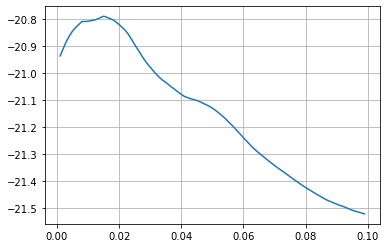

In [29]:
plt.plot(alpha,error)
plt.grid()

plt.show()

## RandomForest Model

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
from sklearn.metrics import r2_score

In [31]:
Rf=RandomForestRegressor()

In [32]:
score3=cross_val_score(Rf,trainx,trainy,scoring="neg_mean_absolute_error")

In [33]:
score3.mean()

-14.861601623700327

In [73]:
score3i=cross_val_score(Rf,trainx,trainy,cv=10)
score3i.mean()*100

63.28882535773263

#### RandomForest Model Tuning

In [36]:
search={"n_estimators":[int(i) for i in np.arange(50,1000,10)],
        "max_features" : ["auto", "sqrt", "log2"],
        "criterion" : ["mse", "mae"]}

In [37]:
rfr=RandomForestRegressor()

In [38]:
bestrf=RandomizedSearchCV(estimator=rfr,param_distributions=search,n_jobs=-1,cv=5,random_state=100)

In [39]:
bestrf.fit(trainx,trainy)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240, 250,
                                                         260, 270, 280, 290,
                                                         300, 310, 320, 330,
                                                         340, ...]},
                   random_state=100)

In [46]:
bestrf.best_params_

{'n_estimators': 700, 'max_features': 'sqrt', 'criterion': 'mse'}

In [40]:
bestrf.best_score_

0.6763775595474231

In [41]:
bestrfmodel=bestrf.best_estimator_

In [45]:
y1=bestrf.predict(testx)

r2_score(testy,y1)*100

76.90266625818442

In [42]:
score3ii=cross_val_score(bestrfmodel,trainx,trainy,cv=10)
score3ii.mean()

0.6692548932479693

## XGBOOST MODEL

In [63]:
import xgboost
xg=xgboost.XGBRegressor()

In [54]:
scorexg=cross_val_score(xgr,trainx,trainy,cv=5)

In [72]:
scorexg.mean()*100

66.8620856222809

#### XGBOOST MODEL TUNING

In [69]:
search={"learning_rate":[float(i) for i in np.linspace(0.01,1,5)],
       "n_estimators":[int(i) for i in np.arange(50,1000,10)],
       "importance_type":["gain", "weight", "cover", "total_gain" or "total_cover"],
       "base_score":[i for i in np.linspace(0.1,1,5)]}

In [70]:
bestxg=RandomizedSearchCV(estimator=xg,param_distributions=search,n_jobs=-1,cv=5,random_state=100)

In [71]:
bestxg.fit(trainx,trainy)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_jobs=-1,
                   param_distribu

In [75]:
bestxg.best_params_

{'n_estimators': 110,
 'learning_rate': 0.2575,
 'importance_type': 'weight',
 'base_score': 0.55}

In [80]:
bestxg.best_score_*100

66.58774449080907

In [74]:
y2=bestxg.predict(testx)

r2_score(testy,y2)*100

81.36271574558104

In [98]:
bestxgm=bestxg.best_estimator_

In [118]:
bestxgm

XGBRegressor(base_score=0.55, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='weight', interaction_constraints='',
             learning_rate=0.2575, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=110, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [187]:
import pickle

In [188]:
import pickle
pick = {'modelxg': bestxgm}
pickle.dump(pick, open('bestxgm_file' + ".p", "wb" ))

In [189]:
file_name = "bestxgm_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['modelxg']

In [190]:
import pickle
pick1 = {'modelrf': bestrf}
pickle.dump(pick1, open('bestfr_file' + ".p", "wb" ))

In [192]:
file_name = "bestfr_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model2 = data['modelrf']

In [193]:
yj=model.predict(testx)

In [185]:
yj[1]

49.99804

In [194]:
yr=model2.predict(testx)

In [195]:
yr[1]

53.22642857142857